In this notebook we check the geometry and the confinment of the particles generated. 

In [1]:
# %run 'init.ipynb'
# %run 'functions.ipynb'
#%matplotlib inline

Welcome to JupyROOT 6.14/04
server chosen is: /userdata/arocchetti/rootfiles/


In [2]:
#few imports 
import pandas as pd
import numpy as np
from pandas import HDFStore
from pandas import read_hdf
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import ROOT
import root_numpy
from matplotlib import colors
from matplotlib.colors import LogNorm
import matplotlib.patches as patches
import uproot
from matplotlib.patches import Rectangle

In [3]:
offset = 1488/2


In [4]:
#oper with UpRoot --- check out the reiteration among files 
# material = "SS_OuterCryostat"
# rootfile = '/userdata/arocchetti/'+DATE +'/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'

# def get_xyz(rootfile):
#     file = uproot.open(rootfile)
#     tree = file["events/events"]
#     xp = tree["xp_pri"].array()
#     df = tree.pandas.df([ "xp_pri", "yp_pri", "zp_pri"])
#     df.columns = ['X', 'Y', 'Z_uc'] #rename 
#     #Add some variables
#     df['R'] = np.sqrt(df.X*df.X+ df.Y*df.Y)
#     df['R2'] = df.R*df.R
#     offset = 1488/2
#     df['Z'] = df.Z_uc+ offset 
#     return df


In [5]:
# material = [
#     "SS_OuterCryostat",]
# rootfile = '/sc/userdata/arocchetti/XENONnT_2019-10-28/SS_OuterCryostat/U238Pb206/output_SS_OuterCryostat_U238Pb206_1.root'
# print(rootfile)
# data = get_xyz(rootfile)
# data.head()

In [6]:
##read the root file and get the branches you need 
# rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/Teflon_Pillar_/geantinos/output_Teflon_Pillar__geantinos_1.root'

# def get_position(rootfile):
#     f = ROOT.TFile(rootfile)
#     tree = f.Get('events/events')
#     out=root_numpy.tree2array(tree)
#     X = np.array([out['xp_pri'][i] for i in range(len(out['xp_pri']))])
#     Y = np.array([out['yp_pri'][i] for i in range(len(out['yp_pri']))])
#     Z_uc = np.array([out['zp_pri'][i] for i in range(len(out['zp_pri']))]) #z not centered
#     Etot = np.array(out['etot'])
#     f.Close()
#     X,Y, Z_uc, Etot = get_position(rootfile)
#     return  X,Y, Z_uc


In [7]:
#call the function and transform it into a dataframe ---SLOW----
#X,Y, Z_uc, Etot = get_position(rootfile)
#data = pd.DataFrame({'X': X, 'Y': Y, 'Z_uc': Z_uc, 'Etot': Etot})

In [8]:
def print_volume(data):
    plt.hist2d(data.R, data.Z, bins = (300,300), range = ((0, 1000), (-1500, 1700)), 
    norm = LogNorm())
    plt.ylabel('z [mm]')
    plt.xlabel('r [mm]')
    plt.title(material)
    plt.tight_layout()
    plt.title(material)
    fig = plt.figure()
    fig.patch.set_facecolor('xkcd:white')
    plt.show()

def print_volume_pri(data):
    plt.hist2d(data.rp, data.zp, bins = (300,300), range = ((0, 1000), (-1500, 1700)), 
    norm = LogNorm())
    plt.ylabel('z [mm]')
    plt.xlabel('r [mm]')
    plt.title(material)
    plt.tight_layout()
    plt.title(material)
    plt.show()

def print_xy(data):
    plt.hist2d(data.X, data.Y, bins = (300,300), range = ((-1050, 1050), (-1050, 1050)), 
    norm = LogNorm())
    plt.ylabel('x [mm]')
    plt.xlabel('y [mm]')
    plt.title(material)
    plt.tight_layout()
    plt.title(material)
    plt.show()
    


In [9]:
#  if material == 'SS_Innercryostat':
#         rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
#         data = get_xyz(rootfile)
#         flange1_in, flange2_in, flange3_in, shell_in, elongation_in = divide_innercryo(data)
#         print_volume(flange1_in)
#         print_volume(flange2_in)
#         print_volume(flange3_in)
#         print_volume(shell_in)
#         print_volume(elongation_in)
        
#         else: 
#         rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
#         data = get_xyz(rootfile)
#         print_volume(data)
    

In [10]:
# for material in materials:
#     rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
#     data = get_xyz(rootfile)
#     if material == 'SS_OuterCryostat':
#         flange1, flange2, flange3, shell, elongation = divide_outercryo(data)
#         print_xy(flange1)
#         print_xy(flange2)
#         print_xy(flange3)
#         print_xy(shell)
#         print_xy(elongation)
#     else:    
#         print_xy(data)

In [11]:
# plt.figure(figsize=(10,10))
# for material in materials:
#     rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
#     data = get_xyz(rootfile)
#     scatter(data)
    #plt.show()

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

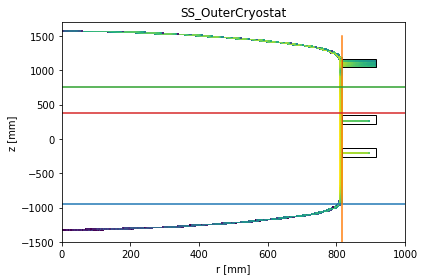

In [12]:
#let's divide the cryostat
material = "SS_OuterCryostat"
data,frac, material  = get_data("Co60", material)

def fig_outercryo(data):     
    plt.hist2d(data.rp, data.zp, bins = (300,300), range = ((0, 1000), (-1500, 1700)), 
        norm = LogNorm())
    plt.ylabel('z [mm]')
    plt.xlabel('r [mm]')
    plt.title(material)
    plt.tight_layout()
    plt.title(material)

    currentAxis = plt.gca()
    offset = 1488/2
    #STIFFENING RINGS OUTCYRO
    currentAxis.add_patch(Rectangle((815, 300+offset), 100, 120,alpha=1, fill=None ))
    currentAxis.add_patch(Rectangle((815, -520+offset), 100, 120,alpha=1, fill=None ))
    currentAxis.add_patch(Rectangle((815, -1000+offset), 100, 120,alpha=1, fill=None ))

    plt.plot([0,1000],[-950, -950])
    plt.plot([815, 815],[-1500, 1500])
    top_flange = 300+offset+120
    start_elong = top_flange - 400
    end_elong = start_elong - 380
    plt.plot([0,1000], [start_elong,start_elong ])
    plt.plot([0,1000], [end_elong,end_elong ])
    
    return plt


fig_outercryo(data)



#let's keep it here if we change sim, but if we do inner/outercryo sep not needed 
#points = ((0,732), (800,500), (-2080,-1796), (0,732))

#plt.plot([0,742],[800+offset,500+offset])
#plt.plot([0,742],[-2080+offset,-1796+offset])
#plt.plot([742,742],[500+offset,-1796+offset])

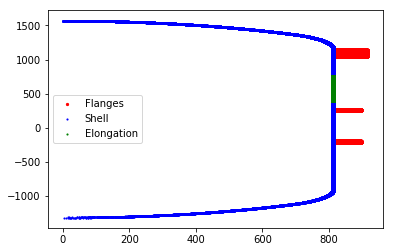

In [21]:
#let's write a function to divide the cryo
#rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/SS_OuterCryostat'+ '/geantinos/output_'+ material+'_geantinos_1.root'
#data = get_xyz_root(rootfile)

def divide_outercryo(data):
    
    flange1 = data[(data.rp>815) & (data.zp > 300+offset)]
    flange2 = data[(data.rp>815) & (data.zp < 300+offset) & (data.zp > -520 + offset)] 
    flange3 = data[(data.rp>815) & (data.zp < -520+offset) & (data.zp > -1000 + offset)]
    shell_1 = data[(data.rp<815) & (data.zp > 764)]
    shell_2 = data[(data.rp<815) &  (data.zp < 384)]
    shell = pd.concat([shell_1, shell_2]) 
    elongation = data[(data.rp<815) & (data.zp > 384) & (data.zp < 764)]
    mass_tot = 1046.12 #kg
    geant_tot = len(data)
    mass_flange1 = (mass_tot * len(flange1)) / geant_tot
    #print("mass_flange1:", mass_flange1)
    mass_flange2 = (mass_tot * len(flange2))/ geant_tot
    #print("mass_flange2:",mass_flange2)
    mass_flange3 = (mass_tot *  len(flange3))/ geant_tot
    #print("mass_flange3:",mass_flange3)
    mass_shell = (mass_tot *len(shell))/ geant_tot
    #print("mass shell:",mass_shell)
    mass_elong = (mass_tot * len(elongation))/ geant_tot
    #print("mass elongation:",mass_elong)
    #print(mass_flange1+mass_flange2+mass_flange3)      
    return flange1, flange2, flange3, shell, elongation
    

flange1, flange2, flange3, shell, elongation = divide_outercryo(data)
flanges = pd.concat([flange1, flange2, flange3])
plt.scatter(flanges.rp, flanges.zp, marker = '.', c = "r",  s=20, label = "Flanges")
plt.scatter(shell.rp, shell.zp, marker = '.', c = "b",  s=5,label = "Shell")
plt.scatter(elongation.rp, elongation.zp, marker = '.', c = "g",  s=5,label = "Elongation")
plt.legend()

In [12]:

#print_volume_pri(elongation)

In [13]:
#let's divide the cryostat
def fig_innercryo(): 
    material = "SS_InnerCryostat"
    rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
    data = get_xyz_root(rootfile)
    plt.hist2d(data.rp, data.zp, bins = (300,300), range = ((0, 1000), (-1500, 1700)), 
        norm = LogNorm())
    plt.ylabel('z [mm]')
    plt.xlabel('r [mm]')
    plt.title(material)
    plt.tight_layout()
    plt.title(material)
    currentAxis = plt.gca()
    offset = 1488/2
    #STIFFENING RINGS INNERCRYO
    currentAxis.add_patch(Rectangle((735, 125+offset), 70, 160,alpha=1, fill=None ))
    currentAxis.add_patch(Rectangle((732, -500+offset), 70, 160,alpha=1, fill=None ))
    currentAxis.add_patch(Rectangle((732, -1100+offset), 70, 160,alpha=1, fill=None ))
    return plt

#fig_innercryo()

In [14]:

#rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/SS_InnerCryostat/geantinos/output_SS_InnerCryostat_geantinos_1.root'
#data = get_xyz(rootfile)
#material = "SS_InnerCryostat"
#isotope = "U238"
#rootfile = '/userdata/arocchetti/rootfiles/' +'output_'+ material + '_' + isotope +'_FINAL_Sort' + '.root'
#data = get_xyz(rootfile)

def divide_innercryo(data):
    flange1_in = data[(data.rp>735) & (data.zp > 125+offset)]
    flange2_in = data[(data.rp>735) & (data.zp < 125+offset) & (data.zp > -500 + offset)] 
    flange3_in = data[(data.rp>735) & (data.zp < -500+offset) & (data.zp > -1000 + offset)]
    shell_in = data[(data.rp<735) & (data.zp > -910)]
    elongation_in = data[(data.rp<735) & (data.zp < -910)]
    mass_tot =766.77
    geant_tot = len(data)
    
    mass_flange1_in = (mass_tot * len(flange1_in)) / geant_tot
    #print("mass_flange1_in:", mass_flange1_in)
    mass_flange2_in = (mass_tot * len(flange2_in))/ geant_tot
    #print("mass_flange2_in:",mass_flange2_in)
    mass_flange3_in = (mass_tot *  len(flange3_in))/ geant_tot
    #print("mass_flange3_in:",mass_flange3_in)
    mass_shell_in = (mass_tot *len(shell_in))/ geant_tot
    #print("mass shell_in:",mass_shell_in)
    mass_elong_in = (mass_tot * len(elongation_in))/ geant_tot
    #print("mass elongation:",mass_elong_in)
    #print(mass_flange1_in + mass_flange2_in + mass_flange3_in + mass_shell_in + mass_elong_in)   
    
    
    
    return flange1_in, flange2_in, flange3_in, shell_in, elongation_in

#flange1_in, flange2_in, flange3_in, shell_in, elongation_in = divide_innercryo(data)

#print_volume_pri(elongation_in)

In [15]:
#inspect bell 
def fig_bell():
    plt.hist2d(data.rp, data.zp, bins = (300,300), range = ((600, 800), (500, 1200)), 
        norm = LogNorm())
    plt.ylabel('z [mm]')
    plt.xlabel('r [mm]')
    plt.title(material)
    plt.tight_layout()
    plt.title(material)
    plt.plot([0, 800],[719.29+5,719.29+5])

#fig_bell()

In [16]:
def divide_bellWall(data):
    bottomLip = data[data.zp < (719.29 + 50)]
    bellWall = data[data.zp > (719.29 + 50)]
    mass_bw =33354.05
    geant_bw = len(data)
    
    mass_bottomLip = (mass_bw * len( bottomLip)) / geant_bw
   
    #print("mass_bottomLip:", mass_bottomLip)
    return bottomLip, bellWall

#bottomLip, bellWall = divide_bellWall(data)


In [22]:
components = ["PmtTpc",
             "OuterCryostat_Elongation",
             "OuterCryostatShell", 
             "OuterCryostat_flanges",
             "SS_InnerCryostatShell",
             "SS_InnerCryostatFlanges",
             "SS_InnerCryostat_bottomDome",
             "SS_BellPlate",
             "SS_BellSideWall",
             "SS_BellSideWallBottomLip",
             "Teflon_Pillar_",
             "SS_AnodeRing",
             "Teflon_TPC_Sliding",
             "Teflon_TPC_Fixed",
             "Teflon_BottomTPC",
              "Copper_TopRing",
             "Copper_FieldGuard_",
              "Copper_FieldShaperRing_",
              "Copper_BottomPmtPlate"
             ]

In [23]:
def scatter(data, material):
    fig= plt.figure(figsize=(40,80))
    import matplotlib.lines as mlines
    plt.scatter(data.rp, data.zp, marker = '.', s=2,label=material )
    c=1
    plt.xlim(-100,1200)
    plt.ylim(-1500, 1700)
    plt.ylabel('z [mm]')
    plt.xlabel('r [mm]')
    plt.tight_layout()
    

In [24]:


fig= plt.figure(figsize=(60,60))
def print_scatter():
    i = 0 
    for component in components:
        i = i+1
        print("working on:" , component)
        isotope = "Ra226"
        data, frac, material = get_data(isotope, component)
        plt.scatter(data.rp, data.zp, marker = '.', s=2,label=component )
    c=1
    plt.xlim(-100,1200)
    plt.ylim(-1500, 1700)
    plt.ylabel('z [mm]')
    plt.xlabel('r [mm]')
    plt.tight_layout()
    plt.legend(markerscale=10, bbox_to_anchor=(105, 100), loc='upper left', fontsize='xx-large')
print_scatter()

working on: PmtTpc
working on: OuterCryostat_Elongation
working on: OuterCryostatShell
working on: OuterCryostat_flanges
working on: SS_InnerCryostatShell
working on: SS_InnerCryostatFlanges
working on: SS_InnerCryostat_bottomDome
working on: SS_BellPlate
working on: SS_BellSideWall
working on: SS_BellSideWallBottomLip
working on: Teflon_Pillar_
working on: SS_AnodeRing
working on: Teflon_TPC_Sliding
working on: Teflon_TPC_Fixed
working on: Teflon_BottomTPC
working on: Copper_TopRing
working on: Copper_FieldGuard_
working on: Copper_FieldShaperRing_
working on: Copper_BottomPmtPlate


ValueError: Image size of 444682x426426 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 4320x4320 with 1 Axes>

In [22]:
#sortfile = "/userdata/arocchetti/rootfiles/output_Teflon_TPC_U238_FINAL.root"
#data_sort = get_xyz(sortfile)
